In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
cnbv_raw = pd.read_csv ('C:/Users/grace/Documents/Machine Learning/CNBV_perdida_esperada_2.csv', dtype={'Cartera_Total': np.float64})

In [3]:
cnbv_raw2 = cnbv_raw[cnbv_raw["Cartera_Total"] != 0]

In [4]:
cnbv_raw2.describe()

,Cartera_Total,Cartera_Vigente,Cartera_Vencida,IMOR,Creditos,Acreditados
count,423068.000000,423068.000000,423068.000000,423068.000000,423068.000000,423068.000000
mean,193.639915,190.102645,3.537246,6.863947,71.328517,51.797380
std,1102.943702,1092.152817,31.826948,21.287071,596.191726,325.916451
min,0.010000,-0.080000,0.000000,0.000000,1.000000,1.000000
25%,1.470000,1.110000,0.000000,0.000000,2.000000,2.000000
50%,10.070000,9.250000,0.000000,0.000000,4.000000,4.000000
75%,63.780000,60.780000,0.180000,0.710000,18.000000,17.000000
max,66764.950000,66198.330000,2404.220000,100.000000,45995.000000,17701.000000


In [5]:
cnbv_raw2["IMOR"].count()

423068

In [6]:
cnbv_raw2[cnbv_raw2['IMOR'] == 100].count()

Escala                          14556
Estado_calculado                14556
Actividad_economica_agragada    14556
Destino_del_credito             14556
Institucion                     14556
Periodo_seguimiento             14556
Cartera                         14556
Cartera_Total                   14556
Cartera_Vigente                 14556
Cartera_Vencida                 14556
IMOR                            14556
Creditos                        14556
Acreditados                     14556
dtype: int64

In [7]:
imor_r = pd.cut(np.array(cnbv_raw2['IMOR']), bins=5, labels=['1', '2', '3', '4', '5'])

In [8]:
imor_pd= pd.DataFrame(imor_r)

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
#target_encoded= le.fit_transform(imor_r)
#target_encoded_pd= pd.DataFrame(target_encoded)

In [11]:
cnbv_raw2["Labels"]= imor_pd[0]

C:\Users\grace\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
cnbv_raw2[['Estado_calculado', 'IMOR']].groupby(['Estado_calculado'], as_index=False).mean().sort_values(by='IMOR', ascending=False).head()

,Estado_calculado,IMOR
30,VERACRUZ,11.201061
25,SINALOA,10.720732
27,TABASCO,10.310560
29,TLAXCALA,10.215682
4,CHIAPAS,10.053438


In [13]:
cnbv_raw2[['Actividad_economica_agragada', 'IMOR']].groupby(['Actividad_economica_agragada'], as_index=False).mean().sort_values(by='IMOR', ascending=False).head()

,Actividad_economica_agragada,IMOR
0,"Agricultura, Silvicultura, Ganaderia y Pesca",10.120853
13,Organismos Internacionales,9.565515
3,Comercio,9.066857
5,Construccion,8.150305
12,Industria Textil y de Calzado,7.770807


In [14]:
cnbv_raw2[['Destino_del_credito', 'IMOR']].groupby(['Destino_del_credito'], as_index=False).mean().sort_values(by='IMOR', ascending=False).head()

,Destino_del_credito,IMOR
15,Garantia de operaciones de mercado de dinero,58.260783
17,Garantía de operaciones de mercado de dinero,55.170000
23,Línea de crédito para liquidez,23.353293
16,Garantia de operaciones derivadas,22.222222
21,Linea de crédito para liquidez,20.639877


In [15]:
cnbv_raw2[['Institucion', 'IMOR']].groupby(['Institucion'], as_index=False).mean().sort_values(by='IMOR', ascending=False).head()

,Institucion,IMOR
17,Bankaool,24.910916
0,ABC Capital,20.648142
25,Finterra,20.367798
28,Inbursa,18.303425
10,Banco Ahorro Famsa,16.750651


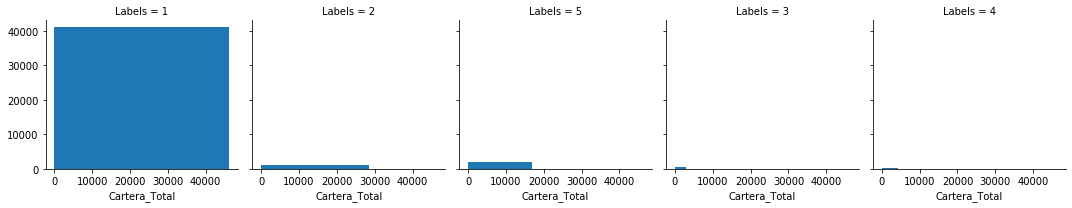

In [16]:
g = sns.FacetGrid(cnbv_raw2, col='Labels')
g.map(plt.hist, 'Cartera_Total', bins=1)

In [17]:
#x = cnbv['Cartera_Total'].str.replace(',', '').str.replace(')', '').str.replace('(', '')
#y = cnbv['Cartera_Vigente'].str.replace(',', '').str.replace(')', '').str.replace('(', '')  
#z = cnbv['Cartera_Vencida'].str.replace(',', '').str.replace(')', '').str.replace('(', '')  

In [18]:
#cnbv['Cartera_Total']= x.astype(float)
#cnbv['Cartera_Vigente']= y.astype(float)
#cnbv['Cartera_Vencida']= z.astype(float)

In [19]:
#cnbv['Cartera_Total'].dropna(inplace=True)
#cnbv['Cartera_Vigente'].dropna(inplace=True)
#cnbv['Cartera_Vencida'].dropna(inplace=True)
#cnbv['IMOR'].dropna(inplace=True)

In [20]:
cnbv= cnbv_raw2.drop(['Labels', 'Cartera_Total', 'Cartera_Vencida', 'Escala', 'Periodo_seguimiento', 'Cartera', 'Creditos', 'Acreditados'], axis=1)
cnbv.head()

,Estado_calculado,Actividad_economica_agragada,Destino_del_credito,Institucion,Cartera_Vigente,IMOR
6,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banca Mifel,26.91,0.00
15,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banorte,18.70,1.53
16,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banregio,54.37,0.00
22,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,HSBC,53.01,0.00
46,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Mobiliario y Equipo,Banco del Bajío,157.47,0.00


In [21]:
state_encoded=le.fit_transform(cnbv['Estado_calculado'])
sector_encoded=le.fit_transform(cnbv['Actividad_economica_agragada'])
credit_encoded=le.fit_transform(cnbv['Destino_del_credito'])
bank_encoded=le.fit_transform(cnbv['Institucion'])
imor= cnbv['IMOR'].to_numpy()
cartera= cnbv['Cartera_Vigente'].to_numpy()

In [22]:
x_y= np.column_stack((state_encoded, sector_encoded, credit_encoded, bank_encoded, cartera, imor))
x_y.shape

(423068, 6)

In [23]:
x_y_pd= pd.DataFrame(x_y)

In [24]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
train, test = train_test_split(x_y_pd, random_state=42, test_size=0.3) # 70% training and 30% test

In [25]:
X = np.array(train.drop([5], 1).astype(float))
X

array([[1.30000e+01, 1.50000e+01, 6.00000e+00, 3.90000e+01, 2.54890e+02],
       [8.00000e+00, 1.50000e+01, 6.00000e+00, 3.30000e+01, 1.04348e+03],
       [8.00000e+00, 9.00000e+00, 6.00000e+00, 3.40000e+01, 1.79800e+01],
       ...,
       [1.70000e+01, 3.00000e+00, 2.80000e+01, 4.00000e+01, 2.50000e-01],
       [2.60000e+01, 8.00000e+00, 1.00000e+00, 2.20000e+01, 1.80000e-01],
       [2.20000e+01, 0.00000e+00, 6.00000e+00, 1.40000e+01, 2.68080e+02]])

In [26]:
y = np.array(x_y_pd[5])

In [27]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto') # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6770218844020031


In [30]:
clusters=pd.DataFrame(kmeans.labels_)
clusters.shape

(296147, 1)

In [33]:
clusters_pd=pd.DataFrame(train)
clusters_pd[7]= clusters[0]
clusters_pd.columns=['Estado_calculado', 'Actividad_economica_agragada', 'Destino_del_credito','Institucion','Cartera Vigente', 'IMOR', 'Clusters']
clusters_pd.head()

,Estado_calculado,Actividad_economica_agragada,Destino_del_credito,Institucion,Cartera Vigente,IMOR,Clusters
26100,13.0,15.0,6.0,39.0,254.89,0.00,0.0
2778,8.0,15.0,6.0,33.0,1043.48,0.00,0.0
265905,8.0,9.0,6.0,34.0,17.98,0.00,0.0
149854,4.0,3.0,6.0,8.0,724.35,1.02,0.0
128351,8.0,7.0,28.0,5.0,12.50,12.16,0.0


In [44]:
cluster_0 = pd.DataFrame(clusters_pd[clusters_pd.Clusters == 0])
cluster_1 = clusters_pd[clusters_pd.Clusters == 1]
cluster_2 = clusters_pd[clusters_pd.Clusters == 2]

In [77]:
cluster_0[['IMOR','Cartera Vigente']].describe()

,IMOR,Cartera Vigente
count,205156.000000,205156.000000
mean,6.949912,177.528597
std,21.434884,997.205676
min,0.000000,-0.050000
25%,0.000000,1.040000
50%,0.000000,8.800000
75%,0.720000,57.962500
max,100.000000,66198.330000


In [75]:
cluster_1[['IMOR','Cartera Vigente']].describe()

,IMOR,Cartera Vigente
count,1990.000000,1990.000000
mean,7.258030,207.061894
std,21.971814,1542.542792
min,0.000000,0.000000
25%,0.000000,1.060000
50%,0.000000,7.700000
75%,0.685000,49.755000
max,100.000000,51001.780000


In [79]:
cluster_2[['IMOR','Cartera Vigente']].describe()

,IMOR,Cartera Vigente
count,204.000000,204.000000
mean,5.742745,163.519461
std,18.469386,659.390426
min,0.000000,0.000000
25%,0.000000,1.562500
50%,0.000000,8.885000
75%,0.420000,53.440000
max,100.000000,7215.510000


In [92]:
c0= cluster_0.groupby('Destino_del_credito').count()
c0 =c0.reset_index(level=0,col_level=0)
c0.sort_values(by='Institucion', ascending=False).head()

,Destino_del_credito,Estado_calculado,Actividad_economica_agragada,Institucion,Cartera Vigente,IMOR,Clusters
6,6.0,106566,106566,106566,106566,106566,106566
28,28.0,23564,23564,23564,23564,23564,23564
25,25.0,21685,21685,21685,21685,21685,21685
0,0.0,15110,15110,15110,15110,15110,15110
1,1.0,12893,12893,12893,12893,12893,12893


In [93]:
c1= cluster_1.groupby('Destino_del_credito').count()
c1 =c1.reset_index(level=0,col_level=0)
c1.sort_values(by='Institucion', ascending=False).head()

,Destino_del_credito,Estado_calculado,Actividad_economica_agragada,Institucion,Cartera Vigente,IMOR,Clusters
5,6.0,1058,1058,1058,1058,1058,1058
21,28.0,212,212,212,212,212,212
19,25.0,193,193,193,193,193,193
0,0.0,137,137,137,137,137,137
1,1.0,131,131,131,131,131,131


In [94]:
c2= cluster_2.groupby('Destino_del_credito').count()
c2 =c2.reset_index(level=0,col_level=0)
c2.sort_values(by='Institucion', ascending=False).head()

,Destino_del_credito,Estado_calculado,Actividad_economica_agragada,Institucion,Cartera Vigente,IMOR,Clusters
5,6.0,118,118,118,118,118,118
11,25.0,19,19,19,19,19,19
13,28.0,19,19,19,19,19,19
1,1.0,15,15,15,15,15,15
0,0.0,11,11,11,11,11,11
